In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.probability import FreqDist

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
'''
When to download them?
Once per environment
Required when: Setting up NLP pipelines and 
                Running NLTK code on a new machine or server
                Using Jupyter/Colab for the first time

These lines download NLTK data resources that are not bundled with 
the NLTK library by default but are required for common Natural Language 
Processing (NLP) tasks
'punkt'--- Provides pre-trained tokenizers for sentence and word segmentation.
           Splits raw text into sentences and words
            Uses linguistic rules (not just spaces or punctuation)
'stopwords'--- Contains lists of stop words for multiple languages.
            Stop words are common words that usually do not add meaning 
            in text analysis.
            Examples of stop words:English: the, is, in, on, at, and, but
            Used in: Text preprocessing, Information retrieval, Machine learning pipelines
'wordnet'---Provides the WordNet lexical database.
            Used for:Lemmatization, Synonym and antonym lookup, Semantic similarity
            WordNet includes: Words grouped into synsets (sets of synonyms)
            Relationships like: Hypernyms (is-a) and Hyponyms (subclasses)
'omw-1.4'--- Stands for Open Multilingual WordNet
            Required by WordNet for multilingual support
            Enables WordNet to work correctly with non-English languages and 
            Needed for newer WordNet versions to function without errors

'''

#additional 
import nltk
nltk.download('punkt_tab')
''' 
punkt_tab contains language-specific statistical tables used by the Punkt 
tokenizer.
These tables store:Abbreviation probabilities, Sentence boundary statistics, 
Orthographic heuristics

Why is it separate from punkt?
Newer NLTK versions split Punkt data into:
punkt → tokenizer code & models
punkt_tab → precomputed parameter tables

This separation: Reduces load time, 
                Improves tokenizer accuracy
                Supports easier updates for multiple languages

When is punkt_tab actually needed?
    It is required when you use sentence tokenization

Without punkt_tab, you may see errors like:
LookupError: Resource punkt_tab not found

What problem does it solve?
    Without punkt_tab, Punkt:Cannot correctly identify:
                            Abbreviations (Dr., Mr.)
                            Sentence boundaries
                            Periods used in numbers or initials
                            Fails or produces incorrect sentence splits'''

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


' \npunkt_tab contains language-specific statistical tables used by the Punkt \ntokenizer.\nThese tables store:Abbreviation probabilities, Sentence boundary statistics, \nOrthographic heuristics\n\nWhy is it separate from punkt?\nNewer NLTK versions split Punkt data into:\npunkt → tokenizer code & models\npunkt_tab → precomputed parameter tables\n\nThis separation: Reduces load time, \n                Improves tokenizer accuracy\n                Supports easier updates for multiple languages\n\nWhen is punkt_tab actually needed?\n    It is required when you use sentence tokenization\n\nWithout punkt_tab, you may see errors like:\nLookupError: Resource punkt_tab not found\n\nWhat problem does it solve?\n    Without punkt_tab, Punkt:Cannot correctly identify:\n                            Abbreviations (Dr., Mr.)\n                            Sentence boundaries\n                            Periods used in numbers or initials\n                            Fails or produces incorrect sentenc

In [6]:
data = open('C:/Users/user1/Downloads./output.txt','r').read()

sentences = sent_tokenize(data)
words = word_tokenize(data)

In [7]:
len(data)

439857

In [8]:
# punctuation 
words = [word.lower() for word in words if word.isalpha()]

In [9]:
# remove stopwords 
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

In [10]:
len(stop_words)

198

In [21]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

In [12]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
processed_text = ' '.join(lemmatized_words)

In [13]:
len(processed_text)

252898

In [14]:
words = nltk.word_tokenize(processed_text)
word_freq = nltk.FreqDist(words)
top_words = word_freq.most_common(40)

In [15]:
top_words

[('said', 738),
 ('poirot', 615),
 ('one', 382),
 ('linnet', 303),
 ('doyle', 300),
 ('yes', 263),
 ('miss', 254),
 ('race', 254),
 ('simon', 247),
 ('would', 232),
 ('know', 231),
 ('think', 228),
 ('like', 183),
 ('man', 180),
 ('cabin', 175),
 ('see', 174),
 ('say', 172),
 ('got', 171),
 ('looked', 169),
 ('went', 169),
 ('little', 167),
 ('thing', 159),
 ('head', 157),
 ('jacqueline', 149),
 ('allerton', 149),
 ('could', 147),
 ('cornelia', 147),
 ('tim', 144),
 ('well', 143),
 ('pennington', 141),
 ('two', 139),
 ('go', 137),
 ('quite', 132),
 ('came', 125),
 ('time', 124),
 ('girl', 119),
 ('come', 116),
 ('face', 115),
 ('de', 114),
 ('fanthorp', 113)]

In [16]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import numpy as np 

(-0.5, 999.5, 499.5, -0.5)

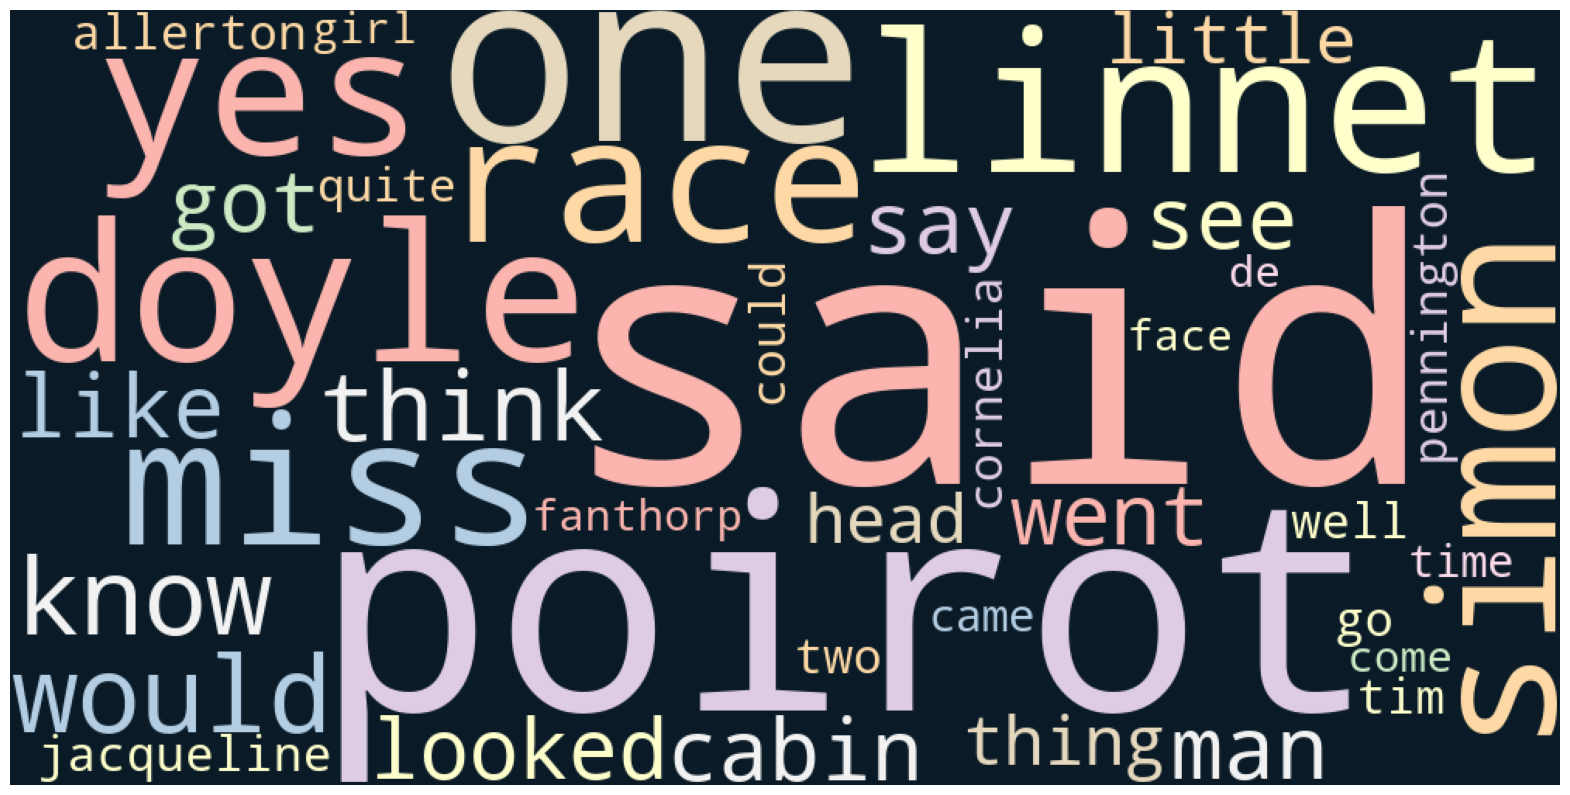

In [22]:
wordcloud = WordCloud(width=1000,height=500,random_state=1,background_color='#0A1B27',colormap='Pastel1',
                     collocations=False,stopwords=STOPWORDS).generate_from_frequencies(dict(top_words))
''' Collocations are pairs of words that commonly appear together in text 
and carry a specific meaning.
Examples: machine learning, artificial intelligence, data science, New York
collocations=True (default) 
    The word cloud may include:Bigram phrases (two-word combinations)
collocations=False
    Only individual words are shown
'''
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis("off")

In [19]:
car_mask = np.array(Image.open("C:/Users/user1/Downloads./cloud2.jpeg"))
car_mask = 255 - car_mask
''' 
These two lines are used to load an image and convert it into a mask 
that controls where words are drawn in a WordCloud.
Image.open(...)
→ Opens the image file using PIL (Python Imaging Library)

np.array(...)
→ Converts the image into a NumPy array of pixel values

Result:
car_mask becomes a 2D or 3D array (depending on image type)
Each element represents a pixel intensity
    Grayscale: 0–255
    RGB: [R, G, B]

This array is used as a mask shape for the WordCloud.'''

' \nThese two lines are used to load an image and convert it into a mask \nthat controls where words are drawn in a WordCloud.\nImage.open(...)\n→ Opens the image file using PIL (Python Imaging Library)\n\nnp.array(...)\n→ Converts the image into a NumPy array of pixel values\n\nResult:\ncar_mask becomes a 2D or 3D array (depending on image type)\nEach element represents a pixel intensity\n    Grayscale: 0–255\n    RGB: [R, G, B]\n\nThis array is used as a mask shape for the WordCloud.'

(-0.5, 318.5, 157.5, -0.5)

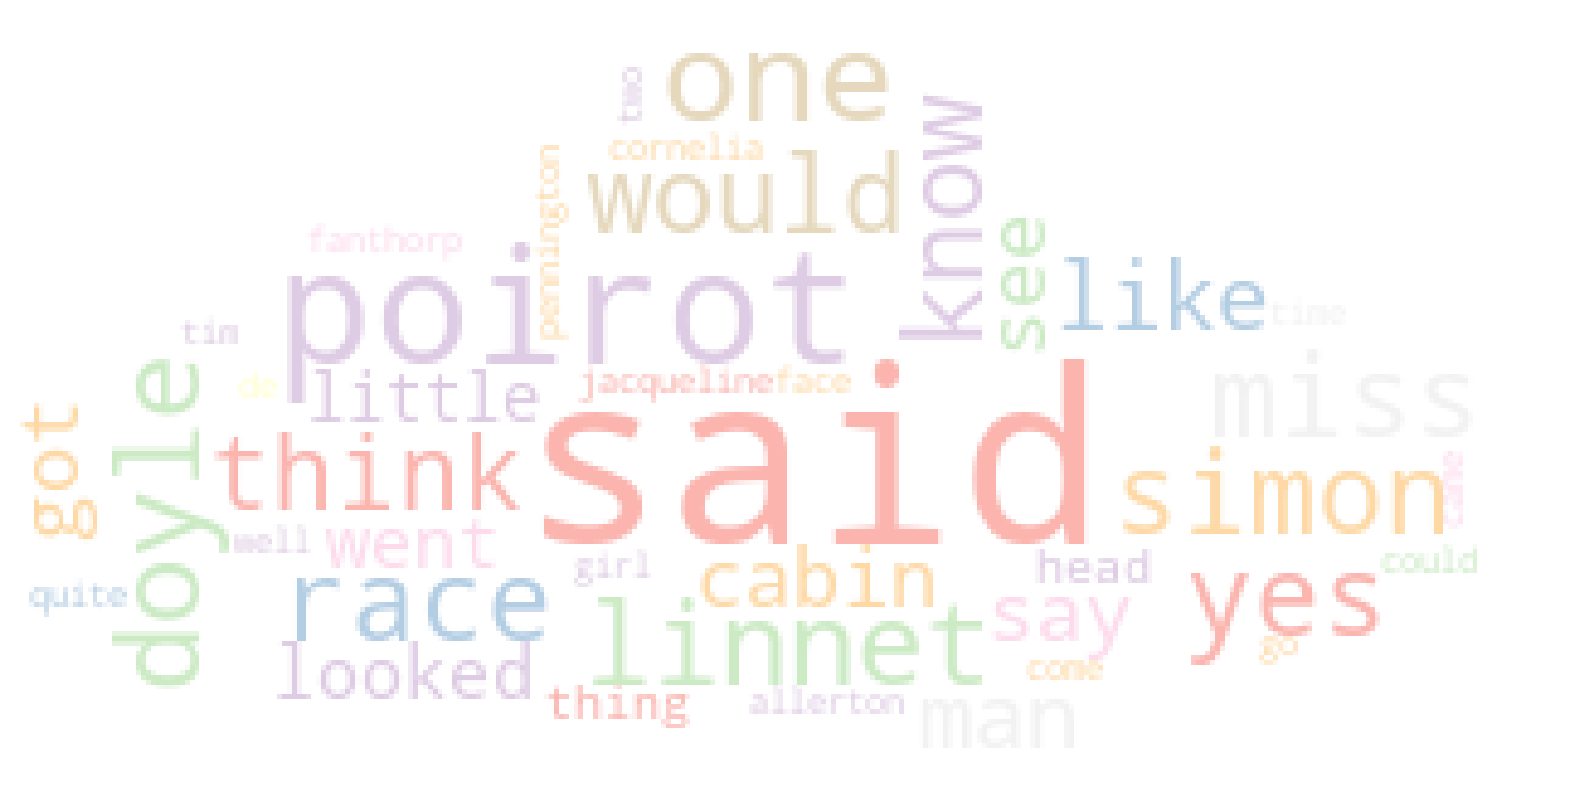

In [20]:
imgggg = WordCloud(width=1000,height=500,random_state=1,mask=car_mask,colormap='Pastel1',
                     collocations=False,stopwords=STOPWORDS,  background_color='rgba(0, 0, 0, 0)',  # Transparent background
    mode='RGBA' ).generate_from_frequencies(dict(top_words))

plt.figure(figsize=(20,15))
plt.imshow(imgggg)
plt.axis("off")